In [2]:
import numpy as np
import matplotlib.pyplot as plt

# implement a function taking X and K as imnputs that returns Phi(X), of shape NxK, the vandermonde matrix associated with X
# Possibly build it column by column

def genPhi(X, K):
    N = len(X)
    phi = np.zeros((N, K))
    for j in range(K):
            phi[:, j] = X**j
    return phi
x = np.array([10,20,30])

Phi = genPhi(x, 3)
Phi 
np.vander(x, 3)



array([[100,  10,   1],
       [400,  20,   1],
       [900,  30,   1]])

In [1]:
N = 100
K = 4

a = 0
b = 1

theta_true = np.ones((K,))

X = np.linspace(a, b, N)

#define Y s.t it is the solution of Phi(x)Theta = Y
Phi = np.vander(X, K)
Y = Phi@ theta_true

print(Y)

# corrupt Y with noise

sigma = 0.1 # variance of the noise

Y = Y + sigma * np.random.normal(0, 1, Y.shape[0]) # noisy Y

# plot

plt.scatter(X, Y, c= "red", s= 5)
plt.grid()


NameError: name 'np' is not defined

In [4]:
Theta_mle = np.linalg.inv(Phi.T@Phi)@Phi.T@Y #---> inefficient!!
print(Theta_mle)
Theta_mle = np.linalg.solve(Phi.T@Phi, Phi.T@Y)
print(Theta_mle)
# since Phi.T@Phi is SPD, cholesky decomposition is even better


[0.41511435 1.97926165 0.54989532 1.04486226]
[0.41511435 1.97926165 0.54989532 1.04486226]


Plot $f_{\theta}(x)$ in the same plot of X and Y to check the approximation

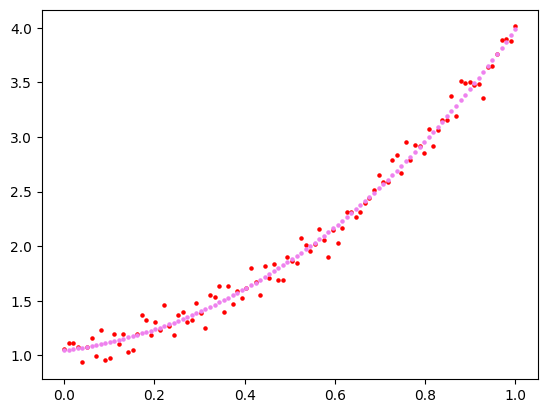

In [5]:
Y_approx = Phi@Theta_mle
plt.scatter(X, Y, c= "red", s= 5)

# XX = np.linspace(a, b, 1000)
# YY = np.vander(XX, K) @ Theta_mle

plt.scatter(X, Y_approx, c="violet", s= 5)
plt.show()

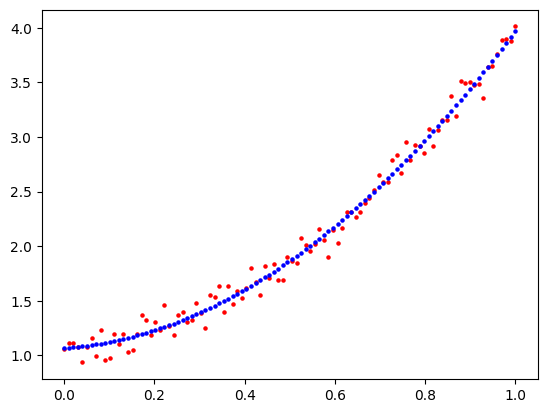

In [6]:
# X and Y are fixed

# pretend not to know K

k_trial = 3

Phi_k = np.vander(X, k_trial)
theta_mle_k = np.linalg.solve(Phi_k.T@Phi_k, Phi_k.T@Y)

# plot the new model on the same plot of the dataset

Y_k = Phi_k @ theta_mle_k

plt.scatter(X, Y, c= "red", s= 5)
plt.scatter(X, Y_k, c= "blue", s= 5)
plt.show()

# Maximum A-Posteriori estimation (MAP)

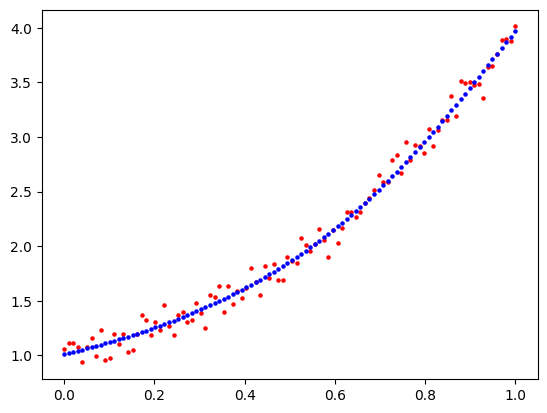

In [7]:
# X and Y are fixed
k_trial = 10
lmbda = .1
Phi_k = np.vander(X, k_trial)
theta_map_k = np.linalg.solve(Phi_k.T@Phi_k + lmbda*np.identity(k_trial), Phi_k.T@Y)

# plot the new model on the same plot of the dataset

Y_k = Phi_k @ theta_map_k

plt.scatter(X, Y, c= "red", s= 5)
plt.scatter(X, Y_k, c= "blue", s= 5)
plt.show()

the advantage is that this model is very sensitive to K, while it is not very sensitive with $\lambda$. \
But if I put a $\lambda$ too big, it will underfit. \
A common starting choice for $\lambda$ is $\lambda \in [0,1]$